In [1]:
pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 50.5 MB/s eta 0:00:00
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.2/745.2 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
  Created

In [4]:
import causalml

In [5]:
import pandas as pd
import numpy as np
from causalml.inference.meta import LRSRegressor, XGBTRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [6]:
data = pd.read_csv('Clustered_Customer_Sales_Data.csv')
data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clusters,PercentWebpurchases
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,66.666667
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,33.333333
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,44.444444
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,33.333333
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,45.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,9817.0,1970.0,44802.0,0.0,0.0,71.0,853.0,10.0,143.0,13.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,42.857143
2227,8080.0,1986.0,26816.0,0.0,0.0,50.0,5.0,1.0,6.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.000000
2228,8372.0,1974.0,34421.0,1.0,0.0,81.0,3.0,3.0,7.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,33.333333
2229,10870.0,1967.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,69.230769


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2231 non-null   float64
 1   Year_Birth               2231 non-null   float64
 2   Income                   2231 non-null   float64
 3   Kidhome                  2231 non-null   float64
 4   Teenhome                 2231 non-null   float64
 5   Recency                  2231 non-null   float64
 6   MntWines                 2231 non-null   float64
 7   MntFruits                2231 non-null   float64
 8   MntMeatProducts          2231 non-null   float64
 9   MntFishProducts          2231 non-null   float64
 10  MntSweetProducts         2231 non-null   float64
 11  MntGoldProds             2231 non-null   float64
 12  NumDealsPurchases        2231 non-null   float64
 13  NumWebPurchases          2231 non-null   float64
 14  NumCatalogPurchases     

In [8]:
# Use the median of the income as a simple threshold for high vs. low income
median_income = data['Income'].median()
data['High_Income'] = (data['Income'] >= median_income).astype(int)
data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clusters,PercentWebpurchases,High_Income
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,66.666667,1
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,33.333333,0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,44.444444,1
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,33.333333,0
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,45.454545,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,9817.0,1970.0,44802.0,0.0,0.0,71.0,853.0,10.0,143.0,13.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,42.857143,0
2227,8080.0,1986.0,26816.0,0.0,0.0,50.0,5.0,1.0,6.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.000000,0
2228,8372.0,1974.0,34421.0,1.0,0.0,81.0,3.0,3.0,7.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,33.333333,0
2229,10870.0,1967.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,69.230769,1


In [9]:
control_cols = ['Kidhome', 'Teenhome', 'Recency','MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumWebVisitsMonth',
        'Complain', 'Response', 'Member_Year',
        'Age', 'Total_Children',
        'Family_Size', 'Cmp_Attitude', 'Education_Basic',
        'Education_Graduation', 'Education_Master', 'Education_PhD',
        'Marital_Status_Alone', 'Marital_Status_Divorced',
        'Marital_Status_Married', 'Marital_Status_Single',
        'Marital_Status_Together', 'Marital_Status_Widow',
        'Marital_Status_YOLO']


# Total Puechases as Target
data['Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']


X = data[control_cols]
y = data['Total_Purchases']

# Treatment variable
treatment = data['High_Income']

# Standardize the control variables
scaler = StandardScaler()

# Create a copy of the dataframe to avoid SettingWithCopyWarning
X_scaled = data[control_cols].copy()
X_scaled[control_cols] = scaler.fit_transform(X_scaled)

# Now split your data
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X_scaled, y, treatment, test_size=0.2, random_state=2024
)

In [10]:
# Initialize models
lr_model = LRSRegressor()
xgb_model = XGBTRegressor()

# Train models
lr_model.fit(X_train, treatment_train, y_train)
xgb_model.fit(X_train, treatment_train, y_train)

# Make predictions
predictions_lr = lr_model.predict(X_test)
predictions_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the models
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_lr))
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))
print(f"LR Model RMSE: {rmse_lr}")
print(f"XGB Model RMSE: {rmse_xgb}")

# Define a function to perform cross-validated ATE estimation
def cross_validate_ate(model, X, treatment, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=2024)
    ates = []

    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        treatment_train_kf, treatment_test_kf = treatment.iloc[train_index], treatment.iloc[test_index]
        y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_kf, treatment_train_kf, y_train_kf)
        ate_est = model.estimate_ate(X_test_kf, treatment_test_kf, y_test_kf)[0]
        ates.append(ate_est)
    return np.mean(ates), np.std(ates)

# Cross-validated ATE for LR model
ate_mean_lr, ate_std_lr = cross_validate_ate(lr_model, X_train, treatment_train, y_train, cv=5)
print(f"LRSRegressor ATE: {ate_mean_lr} (±{ate_std_lr})")

# Cross-validated ATE for XGB model
ate_mean_xgb, ate_std_xgb = cross_validate_ate(xgb_model, X_train, treatment_train, y_train, cv=5)
print(f"XGBTRegressor ATE: {ate_mean_xgb} (±{ate_std_xgb})")

LR Model RMSE: 12.94334502277193
XGB Model RMSE: 18.196270767740995
LRSRegressor ATE: 3.9621649682584974 (±0.29797675311450167)
XGBTRegressor ATE: -0.5144001306204486 (±0.9137349607548964)


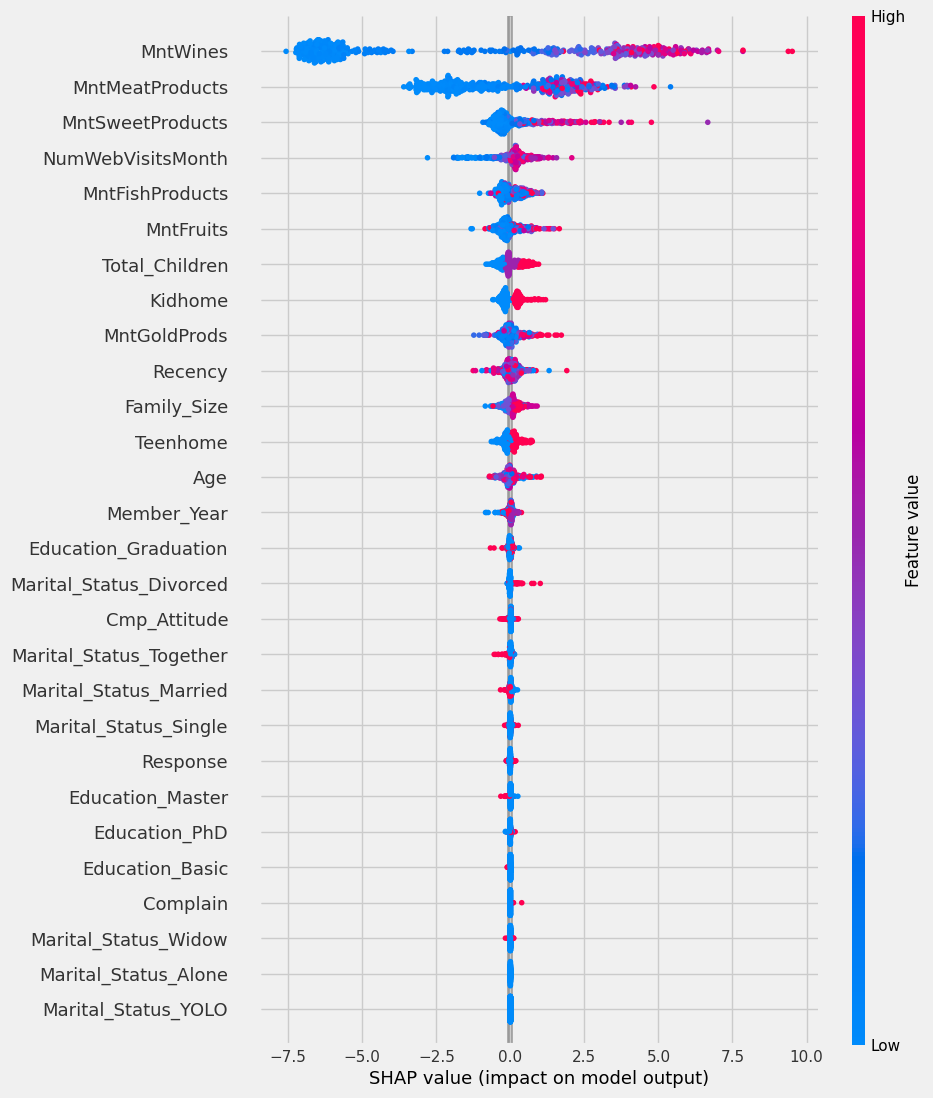

In [11]:
# Use the trained XGB model to obtain SHAP values for the test set
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Plot the SHAP values for high and low income
shap.plots.beeswarm(shap_values, max_display=30)